In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
df = pd.read_csv("C:\Trina\TRU\Data_Analysis_Project\Data_Set\Heart_Disease_Prediction\Heart_Failure_Prediction_Data.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


#### Statistical view of the data

In [21]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


1. The average age is 53.51
2. The average Resting Bloood Pressure is 132.40
3. The average cholesterol level is 198.80mg/dl
4. The mean indicates that about 23% of the observations have a fasting blood sugar level greater than 120mg/dl
5. The average maximum heart rate achived is approximately 136.81 beats per minute
6. The variable represents the ST depression induced by exercise relative to rest, with a average value 0.89.
7. The mean indicates that about 55% of the observations have heart disease.

#### Data Analysis using Visualization

In [22]:
plt.Figure(figsize=(12,8))

<Figure size 960x640 with 0 Axes>

##### The dataset contains both numerical and categorical variable 
##### For numeric variable we are going to use Histogram &
##### For categorical variable we are going to use Count plot

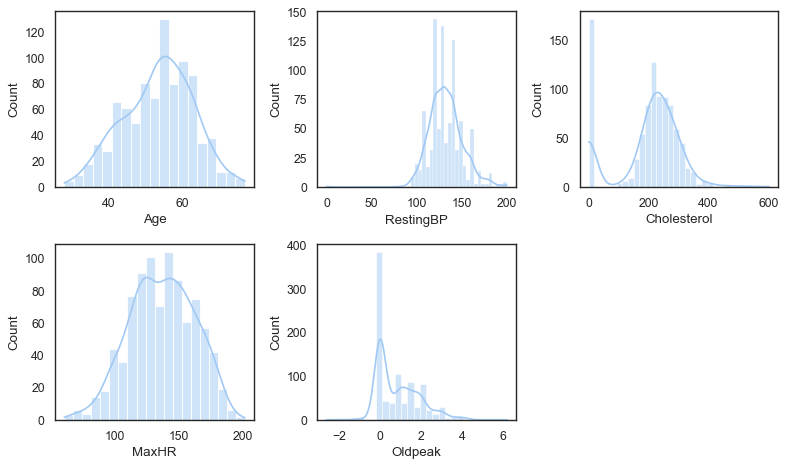

In [40]:
numerical_variable = ['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']

for i, var in enumerate(numerical_variable, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[var], kde = True)

plt.tight_layout()
plt.show()

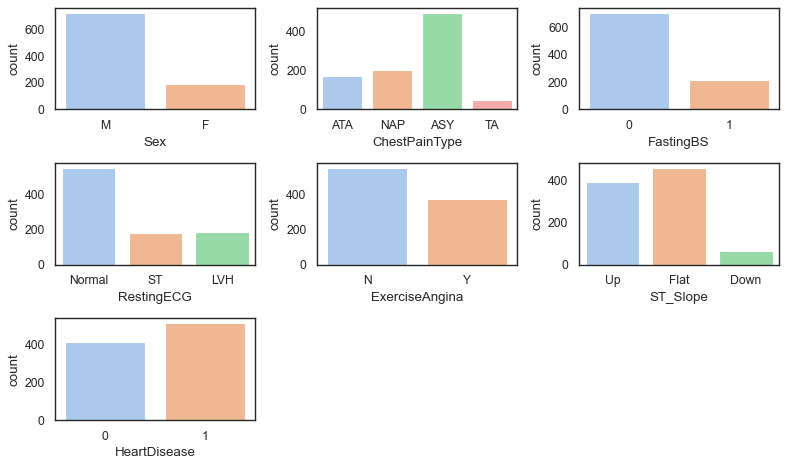

In [39]:
categorical_variable = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
for i, var in enumerate(categorical_variable, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=var)

plt.tight_layout()
plt.show()

##### Checking for data balance/imbalance

<AxesSubplot:>

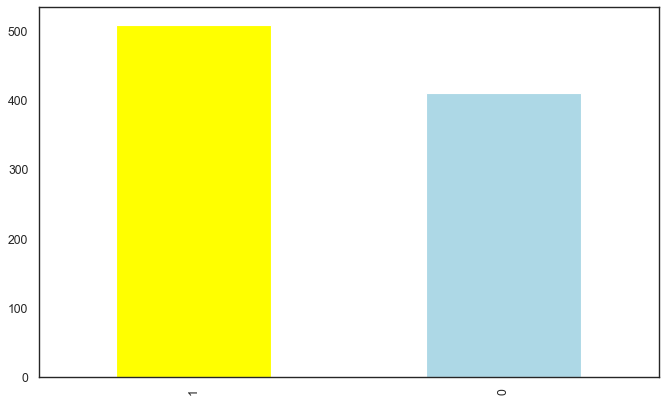

In [32]:
df.HeartDisease.value_counts().plot(kind="bar", color=["yellow", "lightblue"])

##### Data Preprocessing

In [33]:
# Checking for missing values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##### Columns with 10 or fewer unique values are considered categorical, Columns with more than 10 unique values are considered continuous.

In [34]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

Age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingBP : [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol : [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 2

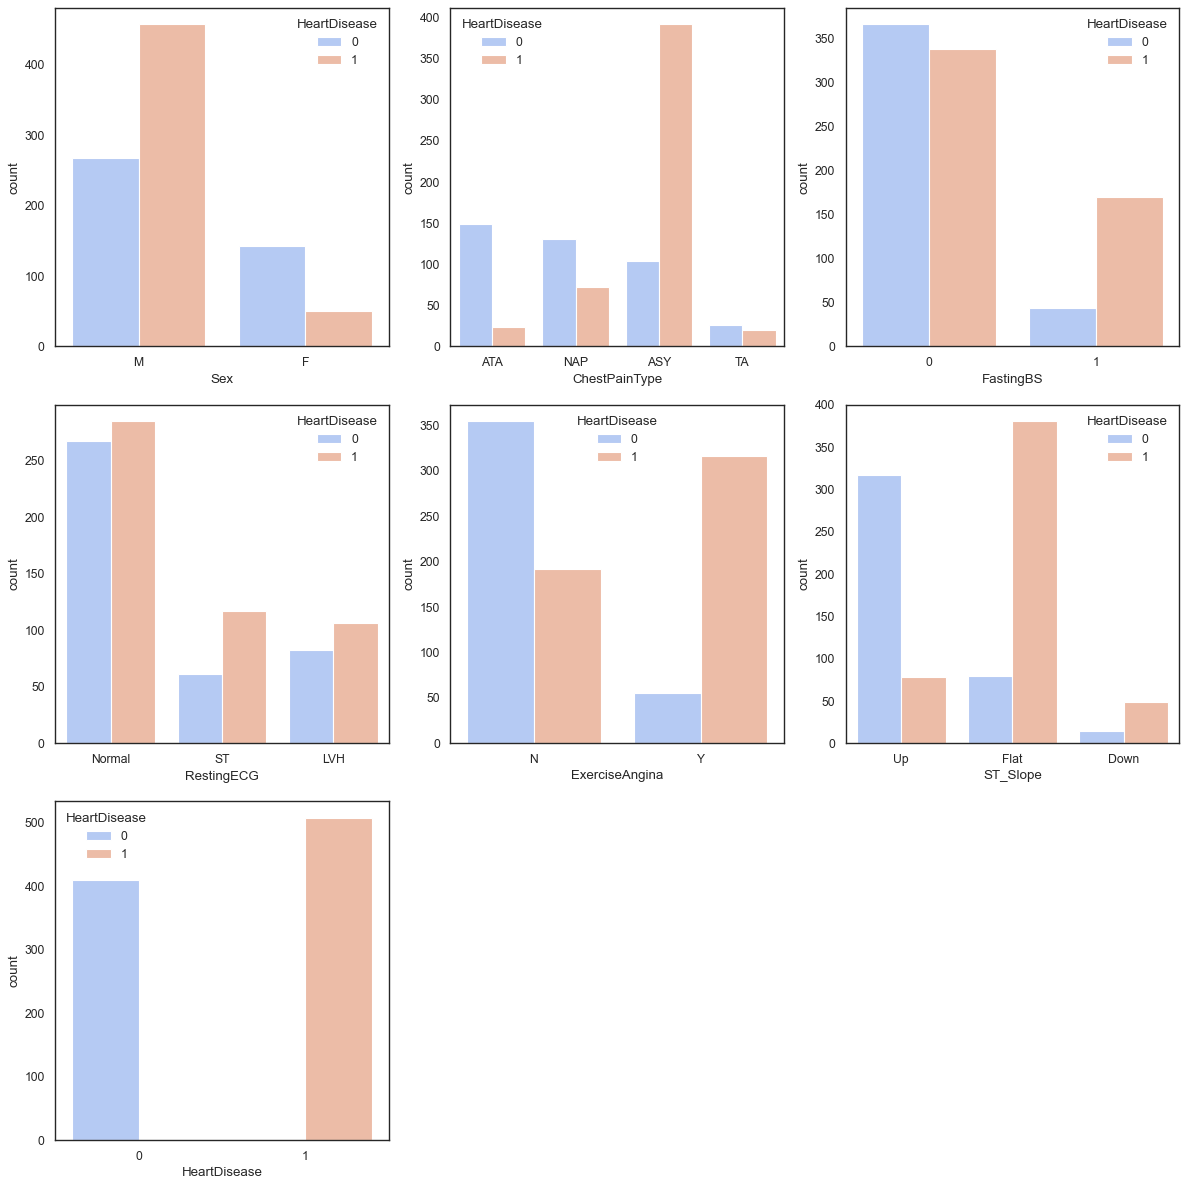

In [36]:
#Plot histograms for categorical variables

plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=column, hue='HeartDisease', palette='coolwarm')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

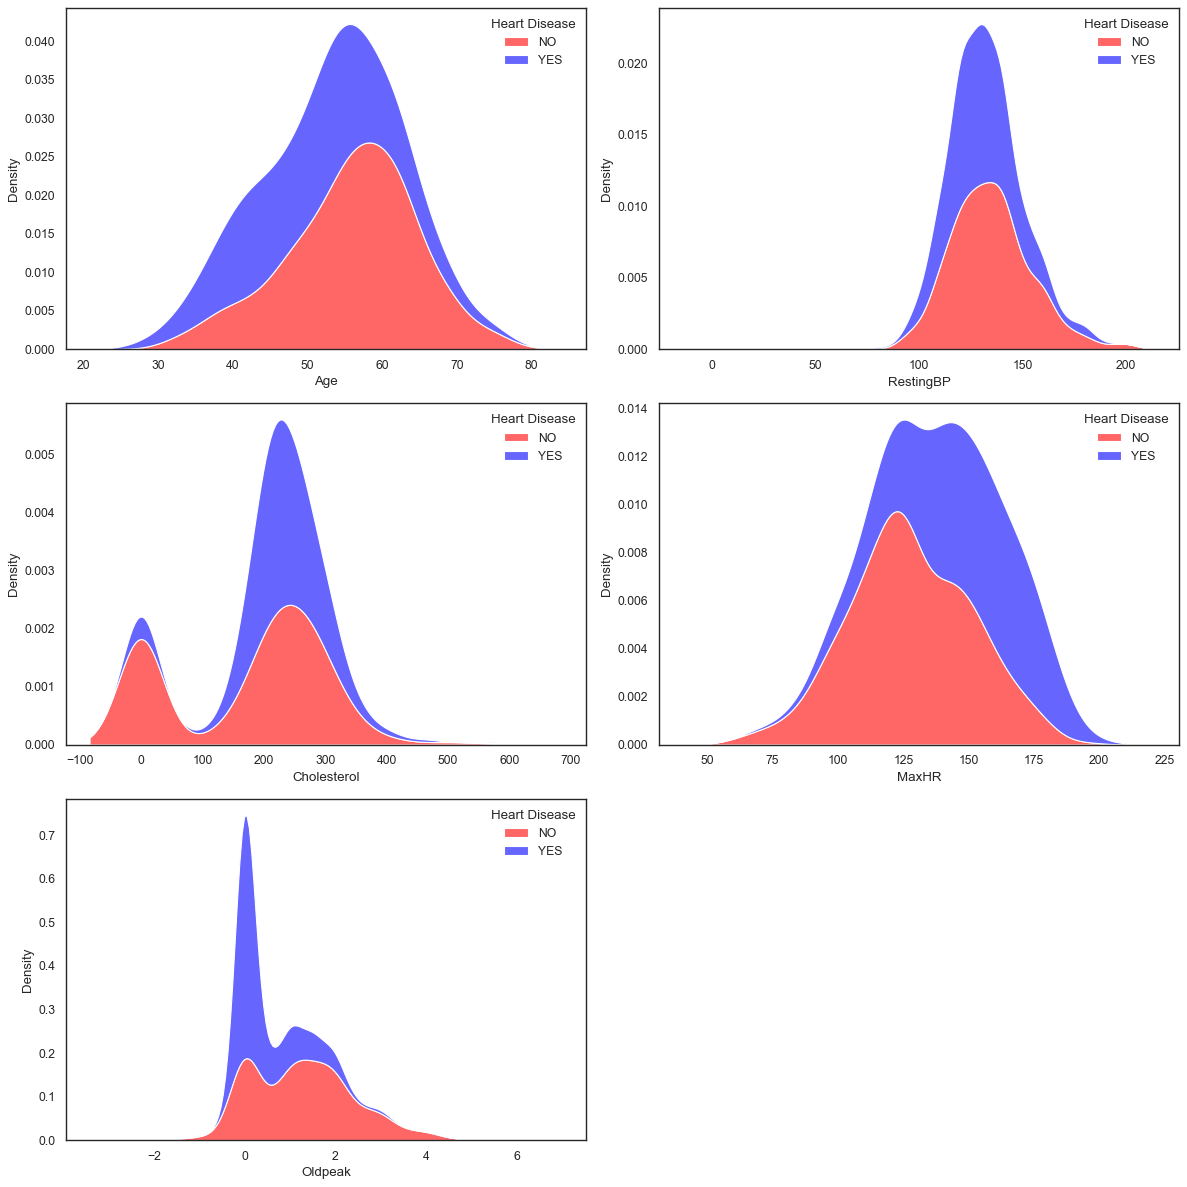

In [38]:
#Distribution of continous variables

plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df, x=column, hue="HeartDisease", fill=True, alpha=0.6, multiple="stack", palette={0: "blue", 1: "red"})
    plt.xlabel(column)
    plt.legend(title="Heart Disease", labels=["NO", "YES"])

plt.tight_layout()
plt.show()

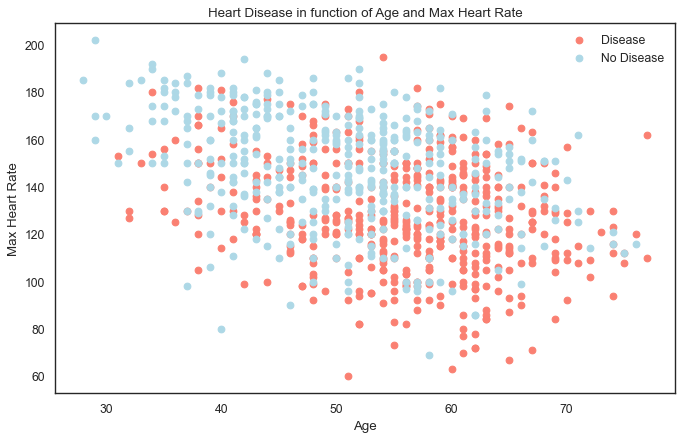

In [44]:
#Plot scatterplot
plt.scatter(df.loc[df['HeartDisease'] == 1, 'Age'], df.loc[df['HeartDisease'] == 1, 'MaxHR'], c='salmon', label='Disease')
plt.scatter(df.loc[df['HeartDisease'] == 0, 'Age'], df.loc[df['HeartDisease'] == 0, 'MaxHR'], c='lightblue', label='No Disease')

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend()
plt.show()

(14.5, -0.5)

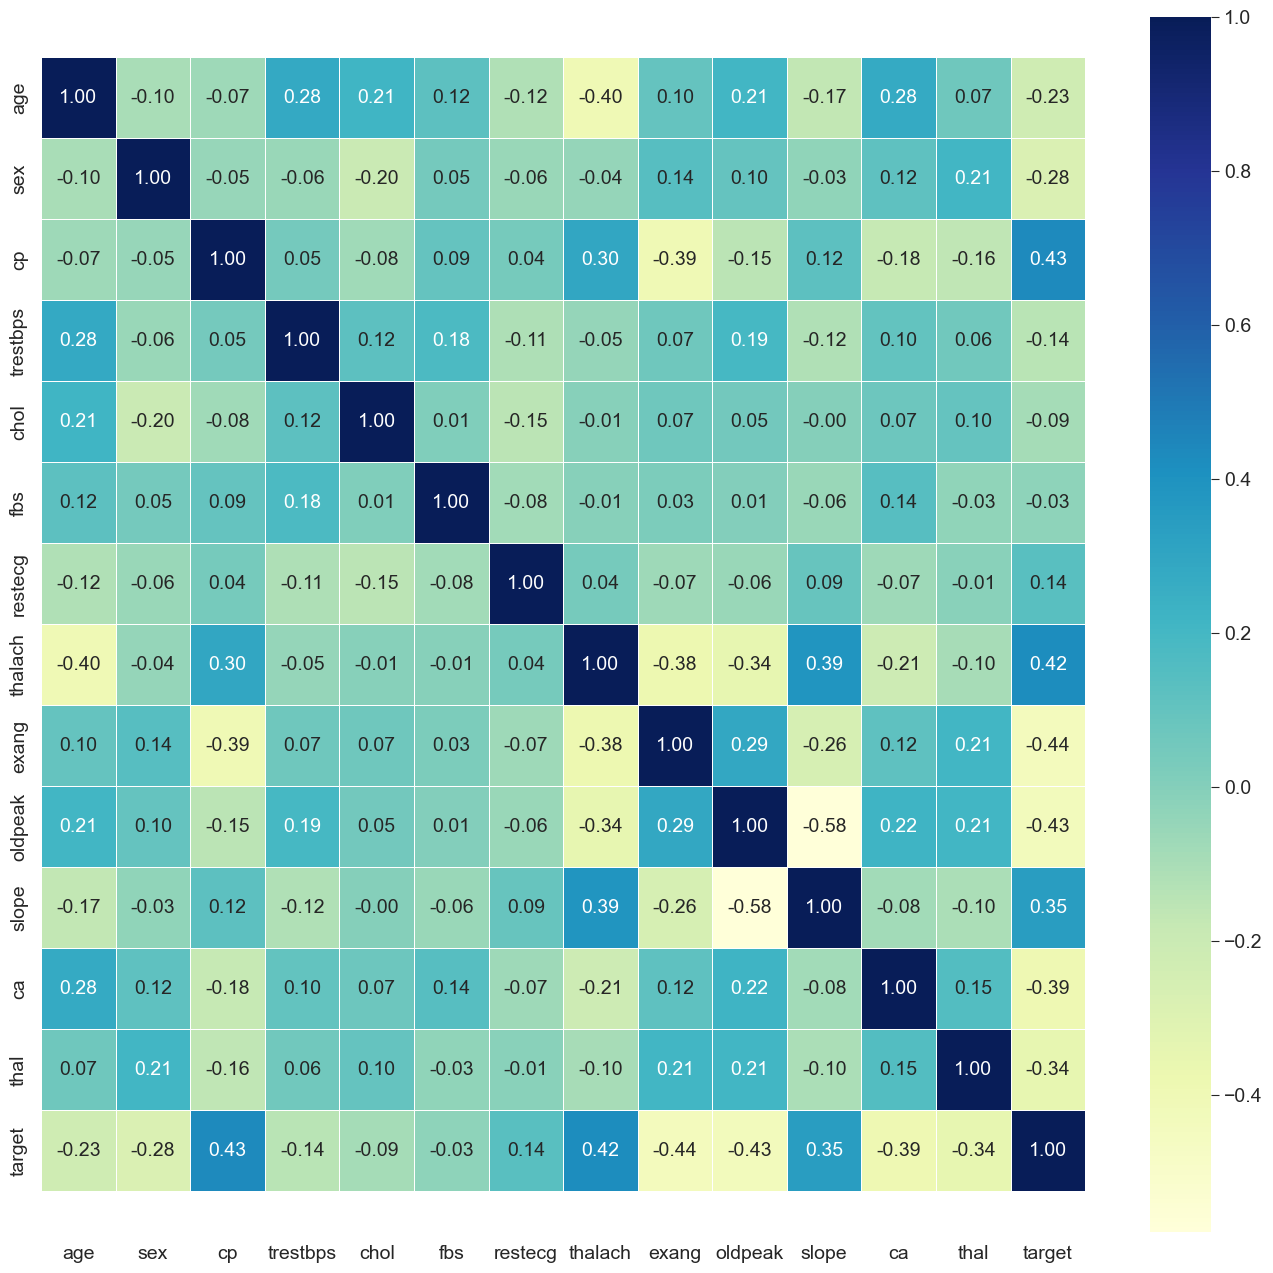

In [30]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

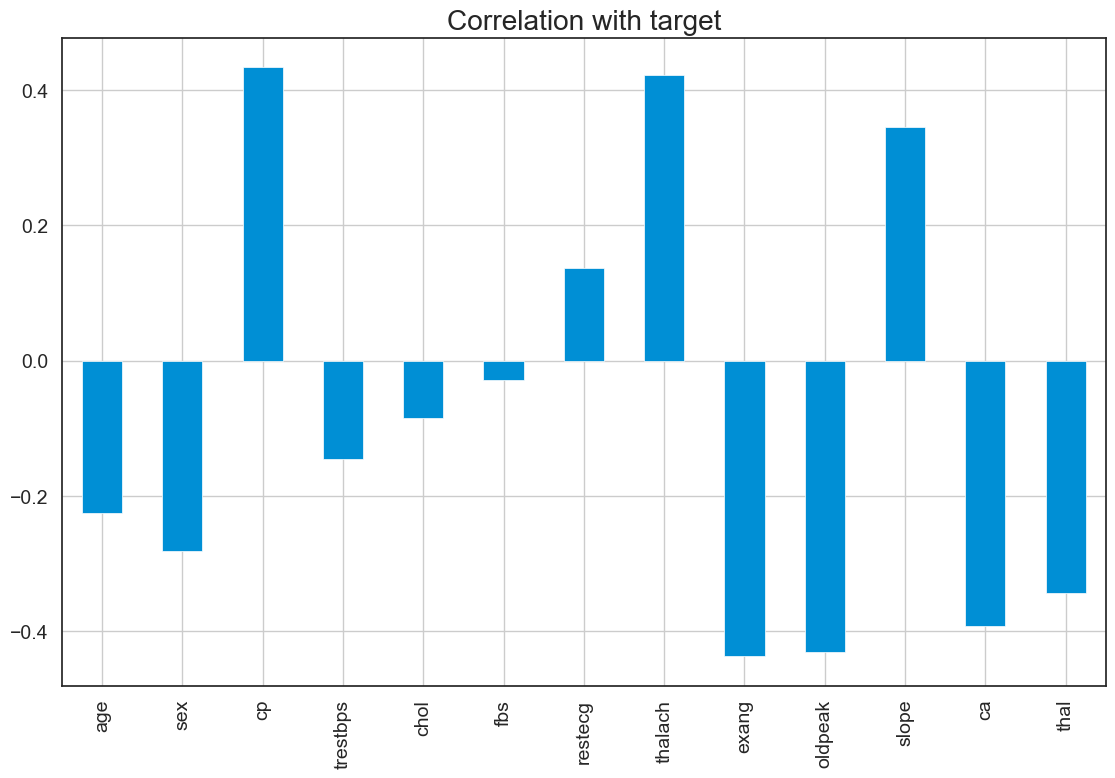

In [31]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [32]:
#Scaling values

categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [34]:
#Data splitting

from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
#Start training the model

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.86      0.87       0.87          0.87
recall     0.82   0.90      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



##### Accuracy Score: The accuracy score on the training set is 86.79%. This means that the model correctly predicts the class labels for approximately 86.79% of the instances in the training set.

##### Classification Report: This report provides precision, recall, F1-score, and support for each class.
    Precision: It measures the proportion of true positive predictions among all positive predictions. For class 0, precision is 0.88, and for class 1, precision is 0.86.
    Recall: It measures the proportion of true positive predictions among all actual positives. For class 0, recall is 0.82, and for class 1, recall is 0.90.
    F1-score: It is the harmonic mean of precision and recall and provides a balance between them. For class 0, the F1-score is 0.85, and for class 1, the F1-score is 0.88.
    Support: It is the number of actual occurrences of the class in the specified dataset. For class 0, support is 97, and for class 1, support is 115.
    
##### Confusion Matrix: This matrix shows the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. For example, in the confusion matrix:
    TP for class 0 is 80.
    TN for class 1 is 104.
    FP for class 0 is 17.
    FN for class 1 is 11.
    
##### Testing Result:
    Accuracy Score: The accuracy score on the testing set is 86.81%, which is very close to the training accuracy, indicating good generalization performance.
    Classification Report: Similar to the training report, it provides precision, recall, F1-score, and support for each class.
    Confusion Matrix: Like in the training set, it shows the counts of TP, TN, FP, and FN predictions for the testing set.

##### Interpretation:
    - The model performs well on both the training and testing sets, indicating that it has learned patterns from the training data and can generalize well to unseen data.
    - Precision, recall, and F1-score are balanced for both classes, indicating that the model is making predictions with relatively equal performance across the classes.
    - The confusion matrices provide additional insight into the model's performance, showing how well it distinguishes between the two classes.

##### Overall, these results suggest that the model is reliable and performs well in classifying instances into the two classes.

In [36]:
#Evaluate model performance

test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
